<div style="text-align: right;">
    <strong>Author:</strong> Mizanu Zelalem Degu  <br>
    <strong>Institution:</strong> Jimma University Institute of Technology  <br>
    Image Processing  - Lab 3 
</div>

# Lab 3: Frequency Domain Filtering

## 3.1 Fourier Transform and Inverse Fourier Transform

The Fourier Transform decomposes an image into its frequency components. For an image f(x,y) of size M×N:

F(u,v) = Σ_{x=0}^{M-1} Σ_{y=0}^{N-1} f(x,y) e^{<b>-j2π(ux/M + vy/N)</b>}

Inverse Fourier Transform reconstructs the image from frequency components:

f(x,y) = 1/MN Σ_{u=0}^{M-1} Σ_{v=0}^{N-1} F(u,v) e^{<b>j2π(ux/M + vy/N)</b>}

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

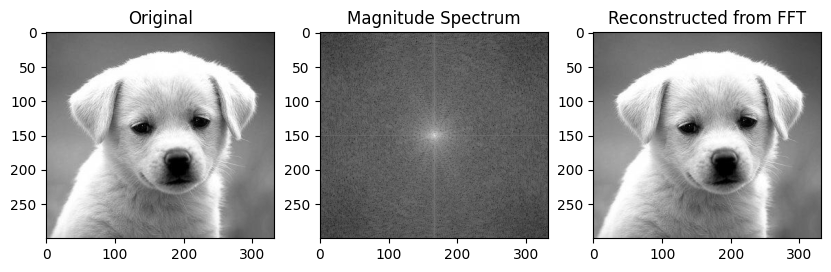

In [6]:
def compute_fft(image):
    # Compute FFT and shift zero frequency to center
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude = 20*np.log(np.abs(fshift))
    return fshift, magnitude

def inverse_fft(fshift):
    # Inverse shift and inverse FFT
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    return np.abs(img_back)


gray_img = cv2.imread('sample_1channel.jpg',cv2.IMREAD_GRAYSCALE)
# Compute FFT
fshift, magnitude = compute_fft(gray_img)

# Reconstruct image
img_back = inverse_fft(fshift)

plt.figure(figsize=(10, 5))
plt.subplot(131), plt.imshow(gray_img, cmap='gray'), plt.title('Original')
plt.subplot(132), plt.imshow(magnitude, cmap='gray'), plt.title('Magnitude Spectrum')
plt.subplot(133), plt.imshow(img_back, cmap='gray'), plt.title('Reconstructed from FFT')

plt.show()


## 3.2 Smoothing in Frequency Domain

### 3.2.1 Ideal Low-Pass Filter

An ideal low-pass filter passes frequencies within a cutoff D0 and blocks others:

H(u,v) = 1 if D(u,v) ≤ D0
0 otherwise

Where D(u,v) is distance from frequency (u,v) to center.

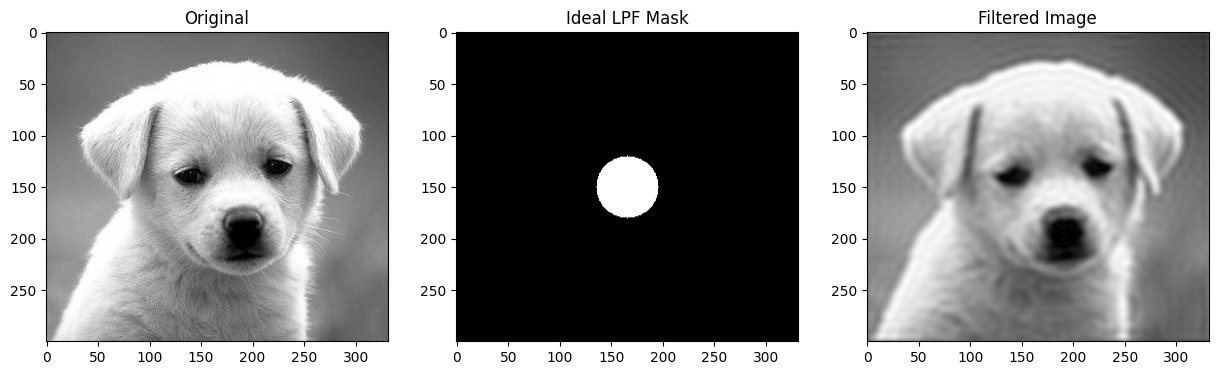

In [16]:
import numpy as np
import cv2

def compute_fft(image):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = np.log(np.abs(fshift) + 1)
    return fshift, magnitude_spectrum

def inverse_fft(fshift):
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back

def ideal_lowpass_filter(image, D0=30):
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2

    # Create mask
    mask = np.zeros((rows, cols), dtype=np.float32)
    for u in range(rows):
        for v in range(cols):
            D = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            if D <= D0:
                mask[u, v] = 1

    # Apply mask
    fshift, _ = compute_fft(image)
    fshift_filtered = fshift * mask

    # Inverse FFT
    img_filtered = inverse_fft(fshift_filtered)
    return img_filtered, mask


gray_img = cv2.imread('sample_1channel.jpg',cv2.IMREAD_GRAYSCALE)

ilpf_img, ilpf_mask = ideal_lowpass_filter(gray_img)

plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(gray_img, cmap='gray'), plt.title('Original')
plt.subplot(132), plt.imshow(ilpf_mask, cmap='gray'), plt.title('Ideal LPF Mask')
plt.subplot(133), plt.imshow(ilpf_img, cmap='gray'), plt.title('Filtered Image')
plt.show()

### 3.2.2 Butterworth Low-Pass Filter

Butterworth LPF has smoother transition than ideal filter:

H(u,v) = 1 / [1 + (D(u,v)/D0)^(2n)]

Where n is the order of the filter.

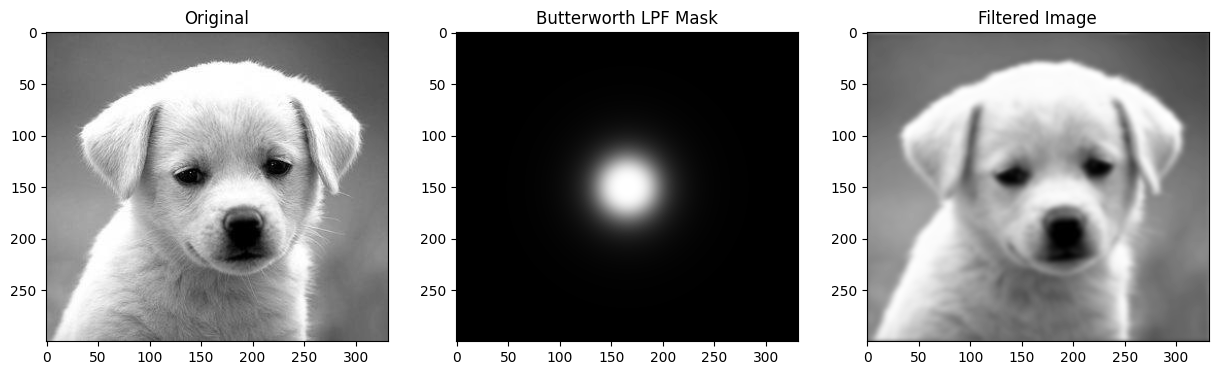

In [17]:
def butterworth_lowpass_filter(image, D0=30, n=2):
    rows, cols = image.shape
    crow, ccol = rows//2, cols//2
    
    # Create distance matrix
    u, v = np.meshgrid(np.arange(cols) - ccol, np.arange(rows) - crow)
    D = np.sqrt(u**2 + v**2)
    
    # Create Butterworth filter
    H = 1 / (1 + (D/D0)**(2*n))
    
    # Apply filter
    fshift, _ = compute_fft(image)
    fshift_filtered = fshift * H
    
    # Inverse FFT
    img_filtered = inverse_fft(fshift_filtered)
    return img_filtered, H


gray_img = cv2.imread('sample_1channel.jpg',cv2.IMREAD_GRAYSCALE)
blpf_img, blpf_mask = butterworth_lowpass_filter(gray_img)

plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(gray_img, cmap='gray'), plt.title('Original')
plt.subplot(132), plt.imshow(blpf_mask, cmap='gray'), plt.title('Butterworth LPF Mask')
plt.subplot(133), plt.imshow(blpf_img, cmap='gray'), plt.title('Filtered Image')
plt.show()

### 3.2.3 Gaussian Low-Pass Filter

Gaussian LPF has a smooth, bell-shaped transition:

H(u,v) = exp(-D²(u,v)/(2D0²))ter.

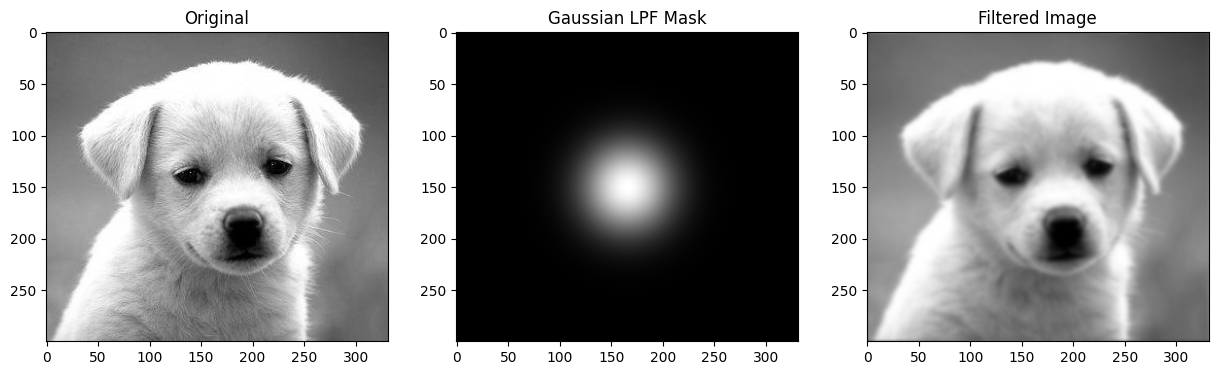

In [18]:
def gaussian_lowpass_filter(image, D0=30):
    rows, cols = image.shape
    crow, ccol = rows//2, cols//2
    
    # Create distance matrix
    u, v = np.meshgrid(np.arange(cols) - ccol, np.arange(rows) - crow)
    D = np.sqrt(u**2 + v**2)
    
    # Create Gaussian filter
    H = np.exp(-(D**2)/(2*(D0**2)))
    
    # Apply filter
    fshift, _ = compute_fft(image)
    fshift_filtered = fshift * H
    
    # Inverse FFT
    img_filtered = inverse_fft(fshift_filtered)
    return img_filtered, H

gray_img = cv2.imread('sample_1channel.jpg',cv2.IMREAD_GRAYSCALE)
glpf_img, glpf_mask = gaussian_lowpass_filter(gray_img)

plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(gray_img, cmap='gray'), plt.title('Original')
plt.subplot(132), plt.imshow(glpf_mask, cmap='gray'), plt.title('Gaussian LPF Mask')
plt.subplot(133), plt.imshow(glpf_img, cmap='gray'), plt.title('Filtered Image')
plt.show()

## 3.3 Sharpening in Frequency Domain

### 3.3.1 Ideal High-Pass Filter

deal high-pass filter blocks frequencies within D0 and passes others:

H(u,v) = 0 if D(u,v) ≤ D0
1 otherwise

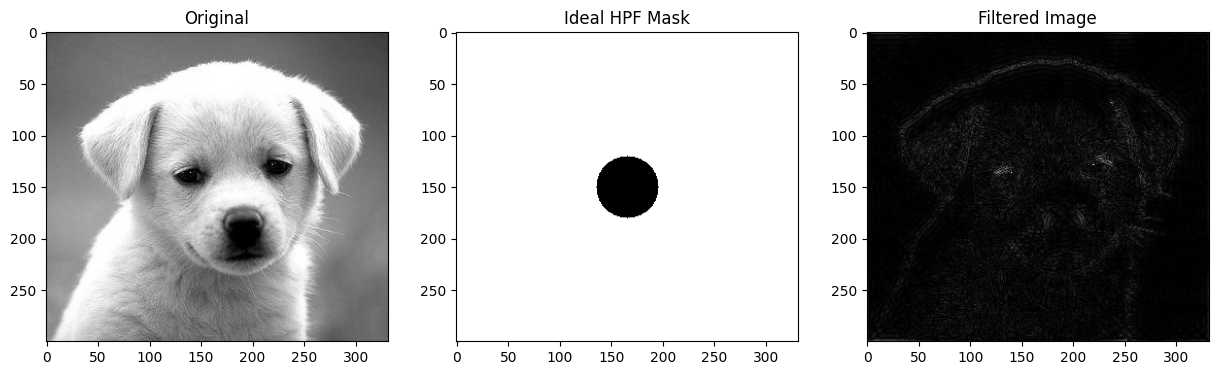

In [20]:
def ideal_highpass_filter(image, D0=30):
    rows, cols = image.shape
    crow, ccol = rows//2, cols//2
    
    # Create mask (inverse of LPF)
    mask = np.ones((rows, cols), np.uint8)
    cv2.circle(mask, (ccol, crow), D0, 0, -1)
    
    # Apply mask
    fshift, _ = compute_fft(image)
    fshift_filtered = fshift * mask
    
    # Inverse FFT
    img_filtered = inverse_fft(fshift_filtered)
    return img_filtered, mask


gray_img = cv2.imread('sample_1channel.jpg',cv2.IMREAD_GRAYSCALE)
ihpf_img, ihpf_mask = ideal_highpass_filter(gray_img)

plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(gray_img, cmap='gray'), plt.title('Original')
plt.subplot(132), plt.imshow(ihpf_mask, cmap='gray'), plt.title('Ideal HPF Mask')
plt.subplot(133), plt.imshow(ihpf_img, cmap='gray'), plt.title('Filtered Image')
plt.show()

### 3.3.2 Butterworth High-Pass Filter

Butterworth HPF is the complement of Butterworth LPF:

H(u,v) = 1 / [1 + (D0/D(u,v))^(2n)]

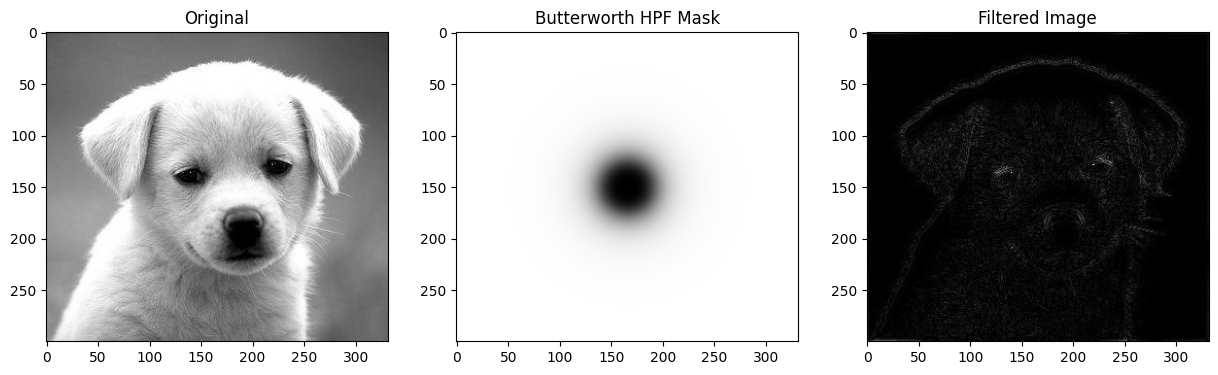

In [24]:
def butterworth_highpass_filter(image, D0=30, n=2):
    rows, cols = image.shape
    crow, ccol = rows//2, cols//2
    
    # Create distance matrix
    u, v = np.meshgrid(np.arange(cols) - ccol, np.arange(rows) - crow)
    D = np.sqrt(u**2 + v**2)
    D[D == 0] = 0.001  # Avoid division by zero
    
    # Create Butterworth HPF
    H = 1 / (1 + (D0/D)**(2*n))
    
    # Apply filter
    fshift, _ = compute_fft(image)
    fshift_filtered = fshift * H
    
    # Inverse FFT
    img_filtered = inverse_fft(fshift_filtered)
    return img_filtered, H


gray_img = cv2.imread('sample_1channel.jpg',cv2.IMREAD_GRAYSCALE)
bhpf_img, bhpf_mask = butterworth_highpass_filter(gray_img)

plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(gray_img, cmap='gray'), plt.title('Original')
plt.subplot(132), plt.imshow(bhpf_mask, cmap='gray'), plt.title('Butterworth HPF Mask')
plt.subplot(133), plt.imshow(bhpf_img, cmap='gray'), plt.title('Filtered Image')
plt.show()

### 3.3.3 Gaussian High-Pass Filter

Gaussian HPF is the complement of Gaussian LPF:

H(u,v) = 1 - exp(-D²(u,v)/(2D0²))

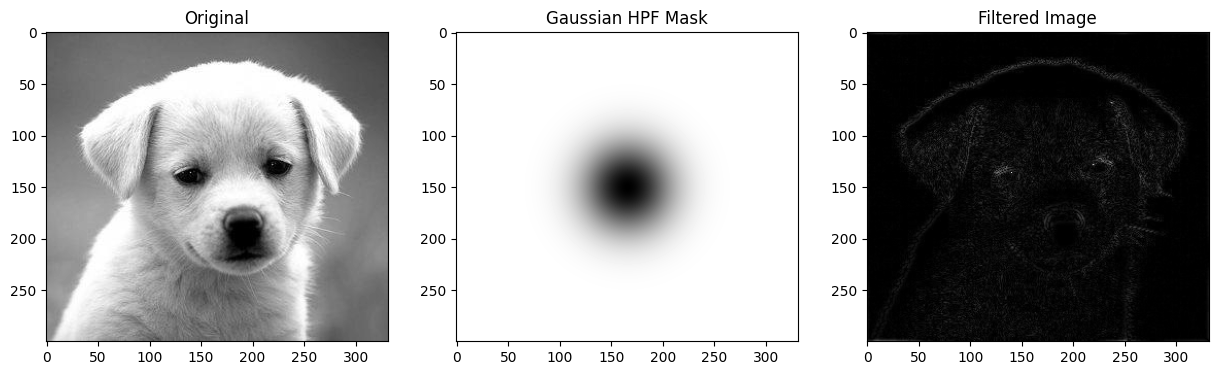

In [25]:
def gaussian_highpass_filter(image, D0=30):
    rows, cols = image.shape
    crow, ccol = rows//2, cols//2
    
    # Create distance matrix
    u, v = np.meshgrid(np.arange(cols) - ccol, np.arange(rows) - crow)
    D = np.sqrt(u**2 + v**2)
    
    # Create Gaussian HPF
    H = 1 - np.exp(-(D**2)/(2*(D0**2)))
    
    # Apply filter
    fshift, _ = compute_fft(image)
    fshift_filtered = fshift * H
    
    # Inverse FFT
    img_filtered = inverse_fft(fshift_filtered)
    return img_filtered, H

gray_img = cv2.imread('sample_1channel.jpg',cv2.IMREAD_GRAYSCALE)
ghpf_img, ghpf_mask = gaussian_highpass_filter(gray_img)

plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(gray_img, cmap='gray'), plt.title('Original')
plt.subplot(132), plt.imshow(ghpf_mask, cmap='gray'), plt.title('Gaussian HPF Mask')
plt.subplot(133), plt.imshow(ghpf_img, cmap='gray'), plt.title('Filtered Image')
plt.show()